<a href="https://colab.research.google.com/github/fabriciosantana/mcdia/blob/main/01-icd/assignments/02-analise-quantitativa-discursos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório Preliminar – Análise Descritiva dos Discursos

Fabrício Fernandes Santana  
Disciplina: Introdução ao Machine Learning – Mestrado em Administração Pública (2025.2)

Este notebook examina o conjunto de discursos proferidos no plenário do Senado Federal durante a 56ª Legislatura (01/02/2019 a 31/01/2023).

**Principais objetivos**:
- compreender a composição do acervo (autores, partidos, datas e metadados)
- identificar padrões temporais de produção de discursos
- analisar o tamanho dos textos e a distribuição de temas (tipos de uso da palavra)
- gerar sumários numéricos e visuais que sirvam de base para estudos posteriores


## 1. Descrição da Base de Dados
A base foi extraída do Portal de Dados Abertos do Senado Federal (https://legis.senado.leg.br/dadosabertos), consolidando 15.729 pronunciamentos com 30 colunas que abrangem informações sobre autores, partidos, datas e textos integrais. 

- **Fonte dos dados:** Portal de Dados Abertos do Senado Federal (https://legis.senado.leg.br/dadosabertos).
- **Contextualização:** Base consolidada com 15.729 pronunciamentos, metadados parlamentares e transcrições integrais da 56ª Legislatura.
- **Objetivo da utilização:** Mapear padrões de volume, autoria, temporalidade e tamanho textual antes das modelagens preditivas.
- **Problema de pesquisa:** Quais dimensões explicativas (tempo, partido, uso da palavra, extensão do texto) ajudam a entender o comportamento discursivo no Senado?
- **Variável Target:** `Partido`. O modelo deverá aprender a prever a filiação partidária do autor a partir das características dos discursos e de seus metadados associados.

## 2. Dicionário de Dados
O arquivo complementar `fabricio_fernanes_santana_atividade_01.xlsx` descreve cada coluna, seus domínios válidos e observações de qualidade, garantindo transparência sobre formatos, possíveis valores ausentes e transformações necessárias antes de iniciar qualquer modelagem.

## 3. Análises Descritivas Iniciais
As análises exploratórias percorrem indicadores de volume, cobertura e distribuição dos discursos, combinando tabelas e gráficos para traduzir o comportamento da base em métricas. 

### 3.1 Medidas de Posição e Dispersão
A contagem anual evidencia o ritmo legislativo recente: foram 3.686 discursos em 2019, queda para 1.518 em 2020 por conta das restrições sanitárias, forte aceleração para 5.503 em 2021 em meio à CPI da Pandemia e 4.988 em 2022 durante o ciclo eleitoral, com 34 registros iniciais em 2023. Esses totais ajudam a contextualizar picos e vales na produção discursiva e justificam o interesse em variáveis temporais como preditores.

As estatísticas textuais indicam que um discurso típico possui 464 palavras (mediana), o que significa que metade das falas contém até esse volume, caracterizando pronunciamentos de cerca de 2,8 mil caracteres. O primeiro quartil em 195 palavras delimita os 25% discursos mais curtos, geralmente registros protocolares ou apartes rápidos, enquanto o terceiro quartil em 912 palavras mostra que um quarto das falas ultrapassa 800 palavras, revelando uma cauda longa com pronunciamentos extensos de comissões. O desvio-padrão de 880 palavras reforça a heterogeneidade do corpus.

### 3.2 Exploração Gráfica
As visualizações temporais demonstram picos de uso do plenário em 2021 e 2022: dezembro de 2022 concentrou 706 discursos e outubro de 2022 apresentou 230 registros, antecipando debates eleitorais. A linha mensal revela sazonalidades que coincidem com votações orçamentárias e comissões especiais, enquanto o gráfico por dia da semana aponta concentração de 4.667 discursos às quartas-feiras e 4.421 às terças, dias de maior agenda deliberativa.

## 4. Discussão Preliminar
Os resultados sugerem protagonismo de líderes partidários e da mesa diretora, em especial do PT, Podemos, MDB e PSD, partidos que dominam o volume anual nas matrizes analisadas. A concentração de discursos entre terça e quinta-feira reflete o calendário regimental e reforça a necessidade de incorporar marcadores temporais e institucionais nas futuras modelagens.

Persistem lacunas em metadados específicos, como órgão e cargo do autor, que apresentam taxas elevadas de ausência. Esses vazios devem ser tratados com cautela para evitar vieses nas análises comparativas, especialmente quando se pretende estudar recortes regionais ou categorias funcionais do parlamento.

## 5. Próximos Passos
A sequência do projeto envolve enriquecer o dataset com variáveis derivadas (por exemplo, indicadores sazonais, métricas textuais e sinais de agenda) e decidir como lidar com os discursos sem transcrição integral antes de treinar modelos supervisionados. Também serão selecionadas visualizações-chave para compor o relatório final da disciplina, assegurando que os achados estatísticos sejam comunicados de forma clara.

## Referências
Portal de Dados Abertos do Senado Federal. Disponível em https://legis.senado.leg.br/dadosabertos. Acesso em 2025.


## Análise quantitativa dos discursos do Senado (56ª Legislatura)
Este bloco contextualiza todo o projeto, apresentando o recorte temporal da 56.ª Legislatura e justificando por que a análise quantitativa dos discursos é crucial para compreender padrões de atividade parlamentar. A partir daqui, cada seção relaciona código e interpretação para construir um panorama coerente do acervo.


## Inicializar e carregar dados
Nesta etapa descrevemos como o ambiente computacional é preparado: definimos o caminho do arquivo local, apontamos o repositório alternativo na nuvem e detalhamos a estratégia de fallback para garantir que o conjunto seja carregado mesmo na ausência do CSV. O objetivo é tornar explícito o fluxo de ingestão antes de qualquer transformação.


### Importar bibliotecas
O código importa bibliotecas de manipulação (`pandas`, `numpy`), visualização (`matplotlib`, `seaborn`) e utilidades (`Path`, `IPython.display`, `datasets`), além de ajustar estilos de gráficos e limites de exibição de colunas para facilitar a leitura posterior. Essa configuração assegura consistência nas visualizações e na inspeção tabular ao longo da análise.


In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datasets import load_dataset
from datasets import load_dataset_builder

pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid', palette='tab10')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

### Carregar e verificar metadados do dataset
Primeiro verificamos se o arquivo CSV local está disponível na pasta `_data`; quando presente, o código registra metadados como tamanho e lista de colunas, oferecendo ao leitor uma noção imediata do escopo do dataset. Caso o arquivo não exista, a rotina consulta automaticamente o repositório Hugging Face, garantindo reprodutibilidade do estudo.

Essa análise inicial ajuda a dimensionar o porte da análise e a justificar escolhas posteriores, como filtragens e agregações específicas.


In [2]:
LOCAL_DATA_FILE = "./_data/discursos_2019-02-01_2023-01-31.csv"

DATASET_HF_REPO = "fabriciosantana/discursos-senado-legislatura-56"
DATA_FILE_HF = {"train": "data/full/discursos_2019-02-01_2023-01-31.parquet"}

if os.path.exists(LOCAL_DATA_FILE):
    local_metadata = {
        "arquivo": str(LOCAL_DATA_FILE),
        "tamanho_MB": round(os.stat(LOCAL_DATA_FILE).st_size / (1024 * 1024), 2),
    }
    preview = pd.read_csv(LOCAL_DATA_FILE, nrows=0)
    local_metadata["colunas"] = preview.columns.tolist()
    display(local_metadata)

    df = pd.read_csv(LOCAL_DATA_FILE, sep=";")
else:
    ds_builder = load_dataset_builder(DATASET_HF_REPO)
    display(ds_builder.info)

    dataset = load_dataset(DATASET_HF_REPO, data_files=DATA_FILE_HF)
    df = dataset["train"].to_pandas()

df

DatasetInfo(description='', citation='', homepage='', license='', features={'id': Value('string'), 'CodigoPronunciamento': Value('string'), 'Casa': Value('string'), 'Data': Value('string'), 'Resumo': Value('string'), 'Indexacao': Value('string'), 'TextoIntegral': Value('string'), 'TextoIntegralTxt': Value('string'), 'UrlTextoBinario': Value('string'), 'TipoAutor': Value('string'), 'FuncaoAutor': Value('string'), 'NomeAutor': Value('string'), 'CodigoParlamentar': Value('string'), 'Partido': Value('string'), 'UF': Value('string'), 'TipoUsoPalavra.Codigo': Value('string'), 'TipoUsoPalavra.Sigla': Value('string'), 'TipoUsoPalavra.Descricao': Value('string'), 'TipoUsoPalavra.IndicadorAtivo': Value('string'), 'Publicacoes.Publicacao': List({'DataPublicacao': Value('string'), 'FontePublicacao': Value('string'), 'PaginaFinal': Value('string'), 'PaginaInicial': Value('string'), 'SiglaFonte': Value('string'), 'TipoPublicacao': Value('string'), 'UrlDiario': Value('string')}), 'Apartes.Aparteante'

,id,CodigoPronunciamento,Casa,Data,Resumo,Indexacao,TextoIntegral,TextoIntegralTxt,UrlTextoBinario,TipoAutor,FuncaoAutor,NomeAutor,CodigoParlamentar,Partido,UF,TipoUsoPalavra.Codigo,TipoUsoPalavra.Sigla,TipoUsoPalavra.Descricao,TipoUsoPalavra.IndicadorAtivo,Publicacoes.Publicacao,Apartes.Aparteante,__janela_inicio,__janela_fim,CargoAutor,OrgaoAutor,PaisAutor,TextoDiscursoIntegral,ok,status,msg
0,451286,451286,Senado Federal,2019-02-27,Comentários a respeito da concentração bancári...,"COMENTARIO, CONCENTRAÇÃO, REDE BANCARIA, COBRA...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Ciro Nogueira,739,PP,PI,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,SENADO FEDERAL SF -\nSECRETARIA-GERAL DA MESA\...,True,200,
1,451285,451285,Senado Federal,2019-02-27,Registro do impacto da reforma da previdência ...,"REGISTRO, REFORMA, PREVIDENCIA SOCIAL, ALTERAÇ...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Paulo Paim,825,PT,RS,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,SENADO FEDERAL SF -\nSECRETARIA-GERAL DA MESA\...,True,200,
2,451205,451205,Senado Federal,2019-02-27,Comentários a respeito da catástrofe ocorrida ...,"COMENTARIO, DESASTRE, ROMPIMENTO, BARRAGEM, BR...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Wellington Fagundes,1173,PR,MT,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,O SR. WELLINGTON FAGUNDES (Bloco Parlamentar V...,True,200,
3,451203,451203,Senado Federal,2019-02-27,Expectativa com o início dos trabalhos no âmbi...,"EXPECTATIVA, INICIO, TRABALHO, COMISSÕES, SENA...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Confúcio Moura,475,MDB,RO,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,O SR. CONFÚCIO MOURA (Bloco Parlamentar Unidos...,True,200,
4,451202,451202,Senado Federal,2019-02-27,Relato da origem e das motivações do Projeto d...,"COMENTARIO, ORIGEM, MOTIVO, PROJETO DE LEI, OB...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Rodrigo Pacheco,5732,DEM,MG,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,O SR. RODRIGO PACHECO (Bloco Parlamentar Vangu...,True,200,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,495469,495469,Senado Federal,2023-01-10,Discurso de posse de S. Exa.,"DISCURSO, POSSE, SENADOR.",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Lael Varella,415,DEM,MG,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2023-01-11', 'FontePublic...",None,2022-12-28,2023-01-27,None,None,None,O SR. LAEL VARELLA (DEM - MG. Para discursar.)...,True,200,
15725,495467,495467,Senado Federal,2023-01-10,"Comunidado do Senador Lael Varella, de filiaçã...","REGISTRO, SENADOR, FILIAÇÃO PARTIDARIA, PARTID...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Autor Externo,EXTERNO,LAEL VIEIRA VARELLA,None,None,None,4838,NID,Não classificado,Sim,"[{'DataPublicacao': '2023-01-11', 'FontePubl

### Analisar estrutura do dataframe
A exibição de `df.shape` e `df.info()` revela a composição do dataframe. Entender os tipos (`dtype`) é fundamental para antecipar quais campos exigirão limpeza, conversões ou tratamento especial de valores ausentes.


In [3]:
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')
df.info()

Linhas: 15729 | Colunas: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15729 entries, 0 to 15728
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             15729 non-null  object
 1   CodigoPronunciamento           15729 non-null  object
 2   Casa                           15729 non-null  object
 3   Data                           15729 non-null  object
 4   Resumo                         15672 non-null  object
 5   Indexacao                      15694 non-null  object
 6   TextoIntegral                  15729 non-null  object
 7   TextoIntegralTxt               15729 non-null  object
 8   UrlTextoBinario                15729 non-null  object
 9   TipoAutor                      15729 non-null  object
 10  FuncaoAutor                    15729 non-null  object
 11  NomeAutor                      15729 non-null  object
 12  CodigoParlamentar              1

## Analisar qualidade dos dados
Esta seção avalia a completude e a consistência das variáveis antes de prosseguirmos para visualizações ou modelagens. Adotamos tabelas de contagem de nulos, métricas resumidas e inspeções direcionadas para identificar colunas críticas cuja ausência de dados pode comprometer interpretações futuras.


### Visão geral dos dados
Construímos um quadro com o tipo de cada coluna e o número absoluto de valores ausentes, permitindo identificar de imediato os atributos mais suscetíveis a problemas de qualidade.


In [4]:
overview = pd.DataFrame({
    'dtype': df.dtypes.astype(str),
    'missing': df.isna().sum()
}).sort_values('missing', ascending=False)
overview

,dtype,missing
PaisAutor,object,15632
OrgaoAutor,object,14918
Apartes.Aparteante,object,14861
CargoAutor,object,14825
Partido,object,2074
CodigoParlamentar,object,2074
UF,object,2074
Publicacoes.Publicacao,object,734
Resumo,object,57
Indexacao,object,35


### Métricas dos dados
O painel de métricas resume dimensões fundamentais do acervo: quantidade de autores distintos, número de discursos, quantidade de partidos e unidades da federação. Essa análise permite observar a variedade da mostra que o corpus captura tanto a diversidade partidária quanto a representatividade regional do Senado.


In [5]:
metrics = pd.Series({
    'Discursos': len(df),
    'Autores únicos': df['NomeAutor'].nunique(),
    'Partidos únicos': df['Partido'].nunique(),
    'UFs representadas': df['UF'].replace('', np.nan).nunique(dropna=True),
    'Funções de autor únicas': df['FuncaoAutor'].replace('', np.nan).nunique(dropna=True),
    'Discursos com resumo': int((df['Resumo'].str.len() > 0).sum()),
    'Discursos com indexação': int((df['Indexacao'].str.len() > 0).sum()),
    'Discursos com texto integral': int((df['TextoDiscursoIntegral'].str.len() > 0).sum())
}).to_frame('quantidade')
metrics

,quantidade
Discursos,15729
Autores únicos,1794
Partidos únicos,32
UFs representadas,27
Funções de autor únicas,3
Discursos com resumo,15672
Discursos com indexação,15666
Discursos com texto integral,15039


### Separar dados faltantes
A tabela dedicada à contagem de nulos ordena os campos mais problemáticos, destacando que `PaisAutor`, `msg`, `OrgaoAutor`, `Apartes.Aparteante` e `CargoAutor` apresentam porcentuais de ausência superiores a 94%. Essas lacunas se explicam porque o portal raramente preenche informações de convidados estrangeiros ou apartes, enquanto algumas colunas servem apenas para mensagens institucionais.

Ao conhecer o percentual de falta, podemos decidir se tais colunas devem ser descartadas, imputadas ou tratadas como categorias especiais. Essa documentação evita surpresas nas fases de modelagem e garante que a análise permaneça alinhada com a cobertura real dos dados.


In [6]:
missing = (
    df.isna()
      .sum()
      .to_frame('faltantes')
      .assign(percentual=lambda s: (s['faltantes'] / len(df) * 100).round(2))
      .sort_values('faltantes', ascending=False)
)
missing.head(10)

,faltantes,percentual
PaisAutor,15632,99.38
OrgaoAutor,14918,94.84
Apartes.Aparteante,14861,94.48
CargoAutor,14825,94.25
Partido,2074,13.19
CodigoParlamentar,2074,13.19
UF,2074,13.19
Publicacoes.Publicacao,734,4.67
Resumo,57,0.36
Indexacao,35,0.22


## Analisar discursos por data
Preparamos variáveis derivadas de `Data`, extraindo ano, mês e dia da semana para suportar agregações temporais detalhadas. O código mostra explicitamente a criação de `ano`, `mes` (como período mensal) e da coluna categórica `dia_semana`, traduzindo os nomes dos dias para o português a fim de manter a clareza na comunicação dos resultados.

Essas derivações possibilitam enxergar sazonalidades e padrões recorrentes da agenda do Senado, permitindo comparar diferentes anos da legislatura ou identificar variações durante o calendário legislativo.


In [7]:
#converte o tipo para datetime
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

#cria coluna para o ano
df['ano'] = df['Data'].dt.year

#cria coluna para o mês
df['mes'] = df['Data'].dt.to_period('M')

dias_map = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

#cria coluna para a semana
df['dia_semana'] = df['Data'].dt.day_name().map(dias_map)

df[["Data", "ano", "mes", "dia_semana"]].head()

,Data,ano,mes,dia_semana
0,2019-02-27,2019,2019-02,Quarta
1,2019-02-27,2019,2019-02,Quarta
2,2019-02-27,2019,2019-02,Quarta
3,2019-02-27,2019,2019-02,Quarta
4,2019-02-27,2019,2019-02,Quarta


### Discursos por ano
O agrupamento anual revela que 2021 foi o ano mais prolífico, com 5.503 discursos, seguido de 2022 com 4.988 registros. O código gera um gráfico de barras e uma tabela que ajudam a visualizar a retomada gradual após a queda de 2020 (1.518 discursos), evidenciando o impacto da pandemia e a posterior intensificação de debates sobre saúde, orçamento e eleições.

Essa distribuição indica que modelos preditivos devem considerar o ano como variável relevante, já que mudanças conjunturais alteram o volume de discursos e podem influenciar o vocabulário utilizado pelos parlamentares.


,ano,qtd_discursos
0,2019,3686
1,2020,1518
2,2021,5503
3,2022,4988
4,2023,34


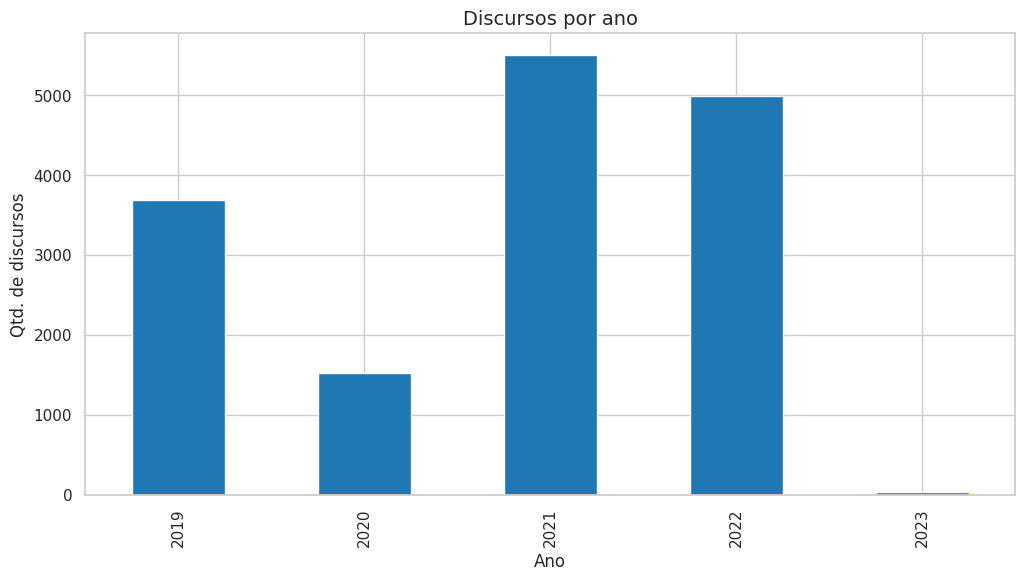

In [8]:
discursos_por_ano = (df.groupby(["ano"])
                     .size()
                     .reset_index(name="qtd_discursos")
                    )

ax = discursos_por_ano.plot(x="ano", y="qtd_discursos", kind="bar", legend=False)
ax.set_title("Discursos por ano")
ax.set_xlabel("Ano")
ax.set_ylabel("Qtd. de discursos")

discursos_por_ano

### Discursos por mês
A série mensal produzida pelo código mostra flutuações alinhadas ao calendário político: dezembro de 2022 atingiu 706 discursos, refletindo esforço concentrado no encerramento da legislatura, enquanto meses como abril de 2020 apresentam menores volumes devido às restrições sanitárias. A linha temporal com marcadores facilita detectar picos localizados relacionados a comissões e votações específicas.

Esse comportamento sazonal sugere que variáveis mensais ou dummies para períodos críticos podem enriquecer análises comparativas e modelos de previsão de atividade parlamentar.


mes
2022-09    104
2022-10    230
2022-11    244
2022-12    706
2023-01     34
Freq: M, Name: discursos, dtype: int64

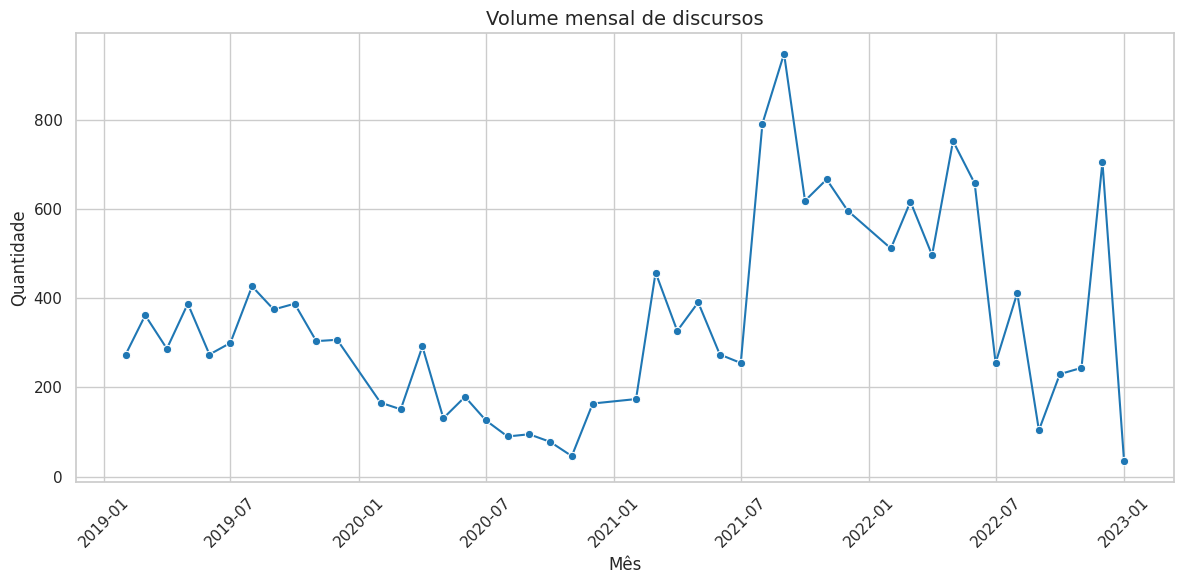

In [9]:
discursos_por_mes = (
    df.dropna(subset=['mes'])
      .groupby('mes')
      .size()
      .rename('discursos')
      .sort_index()
)

fig, ax = plt.subplots()
sns.lineplot(x=discursos_por_mes.index.to_timestamp(), y=discursos_por_mes.values, marker='o', ax=ax)
ax.set(title='Volume mensal de discursos', xlabel='Mês', ylabel='Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
discursos_por_mes.tail()

### Discursos por dia da semana
Ao contar discursos por dia da semana, o código confirma a predominância das sessões deliberativas em meados da semana: quartas-feiras concentram 4.667 discursos e terças-feiras 4.421, enquanto segundas e sextas registram menos ocorrência por serem dias de chegada e retorno aos estados. Esse padrão é visualizado em gráfico de barras e complementado pela tabela equivalente.

Conhecer a distribuição semanal ajuda a planejar filtros ou a interpretar métricas de produtividade legislativa, especialmente quando se deseja comparar comportamento entre parlamentares que ocupam cargos de liderança.


,dia_semana,discursos
0,Segunda,2070
1,Terça,4421
2,Quarta,4667
3,Quinta,2932
4,Sexta,1591


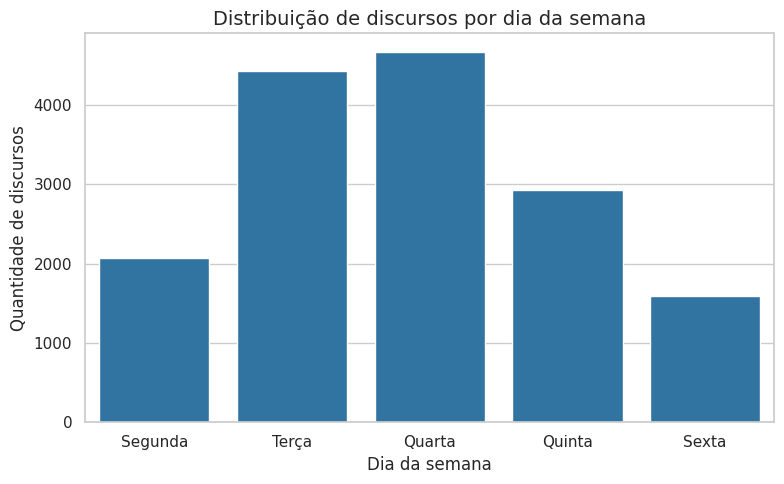

In [10]:
dias_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta']
discurso_por_dia_semana = (
    df.dropna(subset=['dia_semana'])
      .groupby('dia_semana')
      .size()
      .reindex(dias_semana, fill_value=0)
      .rename('discursos')
      .reset_index()
)
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=discurso_por_dia_semana,
    x="dia_semana", y="discursos",
    order=dias_semana,
    color="C0"            # usa uma cor única (evita warning do seaborn)
)
ax.set(title='Distribuição de discursos por dia da semana', 
       xlabel='Dia da semana', 
       ylabel='Quantidade de discursos'
      )

plt.tight_layout()

discurso_por_dia_semana

### Discursos anuais por partido
A matriz resultado do `groupby` apresenta a participação anual dos dez partidos mais prolíficos, ilustrada por um mapa de calor. PT, Podemos e MDB figuram com altos volumes de maneira consistente, enquanto partidos como DEM e PROS têm participação mais concentrada nos primeiros anos da legislatura.

Essa visualização evidencia quais legendas dominam o plenário em cada período, oferecendo insumo direto para a tarefa supervisionada que usa `Partido` como target e apontando possíveis mudanças de agenda ao longo dos anos.


Partido,PT,PODEMOS,MDB,PSD,PSDB,PP,PL,DEM,PROS,CIDADANIA
ano,,,,,,,,,,
2019,465,278,289,177,326,175,69,280,124,106
2020,263,200,152,117,101,67,42,122,28,56
2021,598,592,675,453,423,358,258,347,214,219
2022,561,670,555,579,326,316,457,29,181,129
2023,3,3,4,4,3,3,6,1,1,1


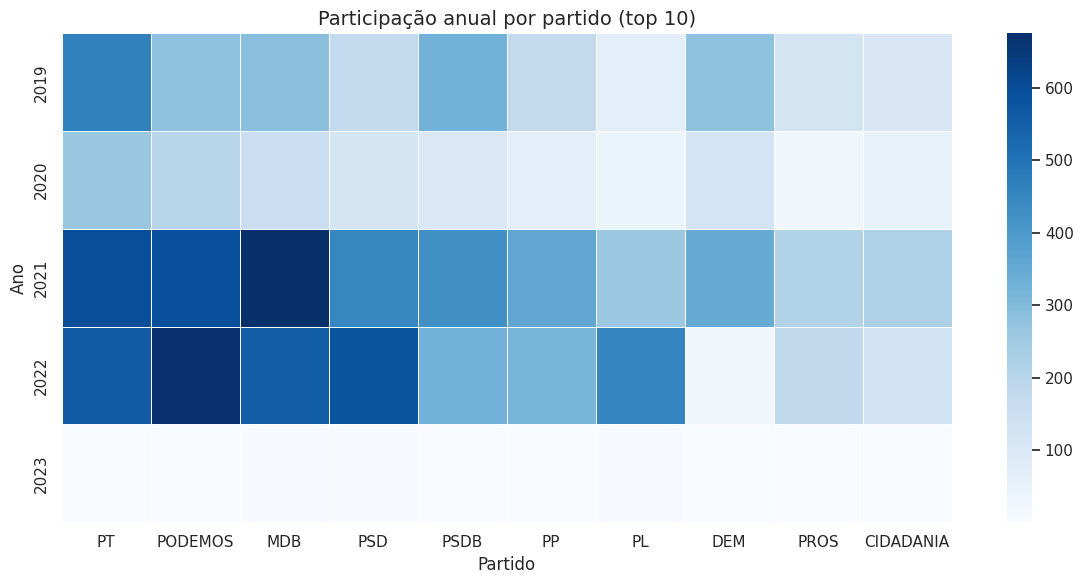

In [11]:
top_partidos_lista = (
    df['Partido']
    .dropna()
    .value_counts()
    .head(10)
    .index
    .tolist()
)
heatmap_data = (
    df[df['Partido'].isin(top_partidos_lista)]
      .dropna(subset=['ano'])
      .groupby(['ano', 'Partido'])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=top_partidos_lista)
      .sort_index()
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, ax=ax)
ax.set(title='Participação anual por partido (top 10)', xlabel='Partido', ylabel='Ano')
plt.tight_layout()
heatmap_data


## Analisar discursos por autor, partido e UF
Esta seção sintetiza o comportamento dos principais atores do Senado, cruzando o volume de discursos com as identidades institucionais dos parlamentares. A cada subseção descrevemos como o código gera rankings e gráficos que destacam autores individuais, partidos e unidades federativas mais ativos.


### Discursos por autor
O ranking de autores mostra que Izalci Lucas realizou 704 discursos, seguido por Paulo Paim (676) e Eduardo Girão (593), reforçando o protagonismo de líderes partidários e membros da mesa. O gráfico de barras horizontal facilita a comparação direta entre os dez senadores mais atuantes e conecta os valores numéricos às figuras políticas correspondentes.

Essas contagens ajudam a identificar outliers e possíveis focos de estudo qualitativo, além de servirem como variáveis explicativas em modelos que investigam padrões de atuação individual.


,NomeAutor,discursos
0,Izalci Lucas,704
1,Paulo Paim,676
2,Eduardo Girão,593
3,Rodrigo Pacheco,496
4,Jorge Kajuru,458
5,Esperidião Amin,409
6,Zenaide Maia,398
7,Jean-Paul Prates,355
8,Paulo Rocha,332
9,Nelsinho Trad,311


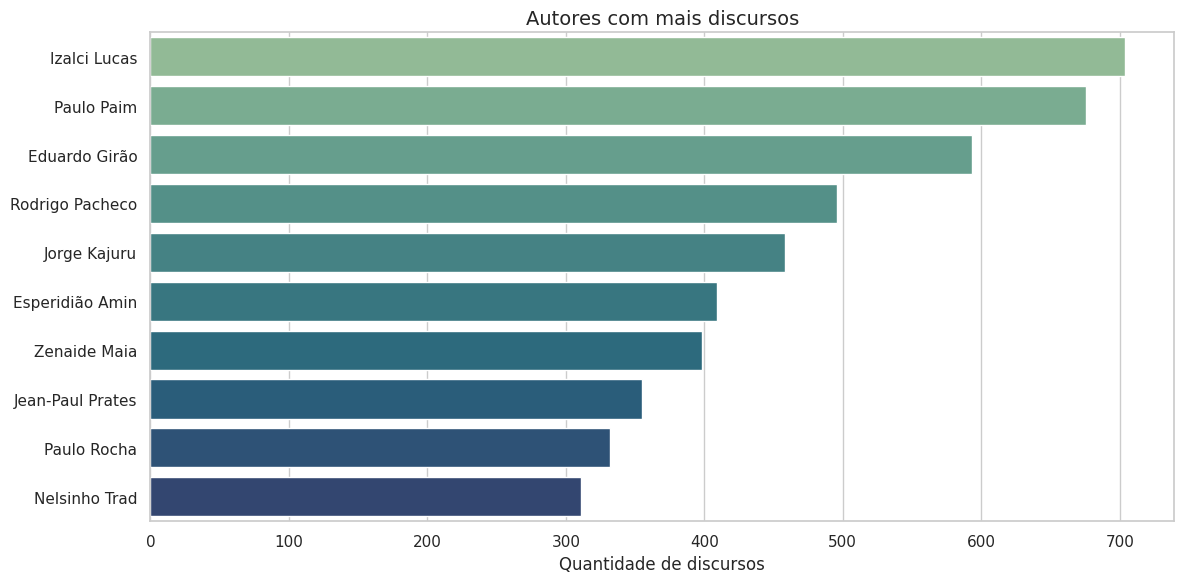

In [12]:
discursos_por_autor = (
    df.groupby('NomeAutor')
      .size()
      .sort_values(ascending=False)
      .head(10)
      .rename('discursos')
      .reset_index()
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=discursos_por_autor, y='NomeAutor', x='discursos', hue='NomeAutor', ax=ax, palette='crest')
ax.set(title='Autores com mais discursos', xlabel='Quantidade de discursos', ylabel='')
plt.tight_layout()
discursos_por_autor

### Discursos por partido
O agrupamento por partido confirma que PT, Podemos, MDB e PSD respondem por boa parte da produção discursiva, com 1.890, 1.743, 1.675 e 1.330 falas, respectivamente. Partidos médios como PSDB e PP também aparecem com volume relevante, refletindo sua presença em comissões e plenário.

Entender essa distribuição é essencial para balancear bases de treinamento supervisionado, garantindo que classes minoritárias recebam tratamento adequado em modelos que predizem filiação a partir do texto.


,Partido,discursos
0,PT,1890
1,PODEMOS,1743
2,MDB,1675
3,PSD,1330
4,PSDB,1179
5,PP,919
6,PL,832
7,DEM,779
8,PROS,548
9,CIDADANIA,511


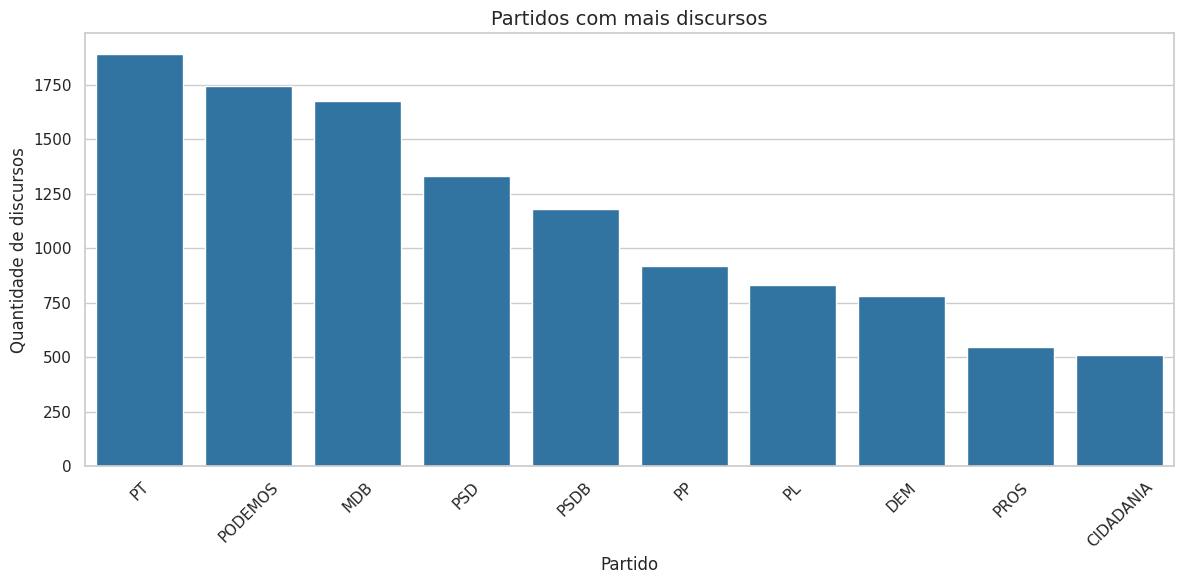

In [13]:
discursos_por_partido = (
    df.groupby('Partido')
      .size()
      .sort_values(ascending=False)
      .head(10)
      .rename('discursos')
      .reset_index()
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=discursos_por_partido, x='Partido', y='discursos', ax=ax)
ax.set(title='Partidos com mais discursos', xlabel='Partido', ylabel='Quantidade de discursos')
plt.xticks(rotation=45)
plt.tight_layout()
discursos_por_partido

### Discursos por UF
Ao contabilizar discursos por unidade da federação, observamos concentração em estados como Rio Grande do Sul (1.128 registros), Distrito Federal (1.056) e Rio Grande do Norte (839), que abrigam senadores muito atuantes ou cargos de liderança. Essa perspectiva regional sinaliza como fatores locais influenciam a presença em plenário.

A interpretação geográfica permite conectar o volume de falas a agendas estaduais e avaliar se determinados estados carecem de representação textual, aspecto útil para políticas de transparência legislativa.


,UF,discursos
0,RS,1128
1,DF,1056
2,RN,839
3,MG,804
4,CE,708
5,MS,625
6,GO,619
7,MT,571
8,SC,565
9,PR,564


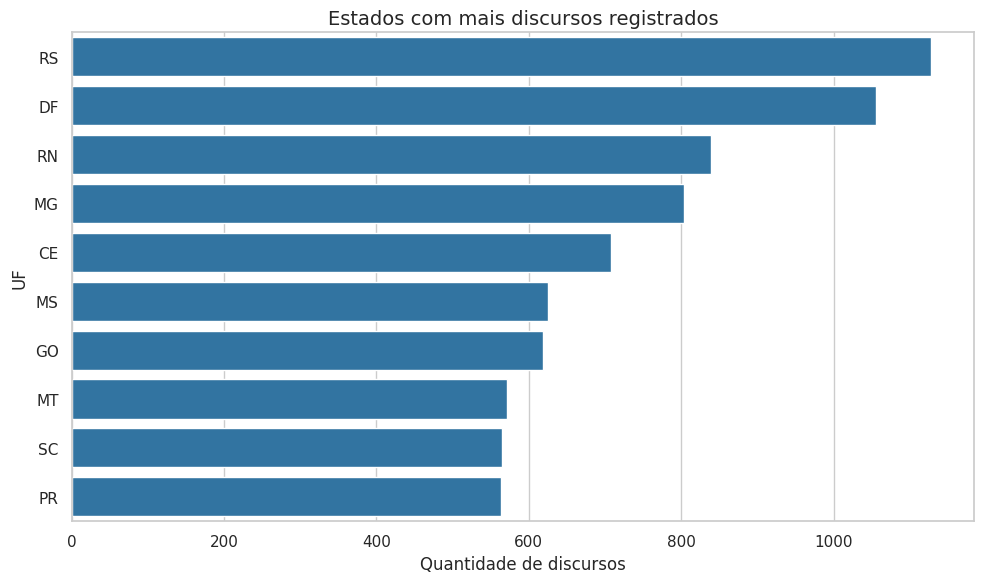

In [14]:
discursos_por_partido = (
    df['UF']
      .replace('', 'Não informado')
      .value_counts()
      .head(10)
      .rename('discursos')
      .reset_index()
      .rename(columns={'index': 'UF'})
)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=discursos_por_partido, x='discursos', y='UF', ax=ax)
ax.set(title='Estados com mais discursos registrados', xlabel='Quantidade de discursos', ylabel='UF')
plt.tight_layout()
discursos_por_partido

### Discursos por tipo de uso da palavra
O recorte por `TipoUsoPalavra.Descricao` mostra que a categoria “Discurso” responde por 5.668 registros e “Pela ordem” por 2.620, seguidas de itens como “Discussão” (1.618) e “Orientação à bancada” (1.340). O código substitui valores vazios por “Não informado” para evitar distorções e oferece um gráfico que evidencia o peso das intervenções regimentais.

Esses números indicam que a maior parte das falas se refere a pronunciamentos formais e orientações de bancada, reforçando o caráter institucional das sessões e apontando possíveis features categóricas para modelagem.


,TipoUsoPalavra.Descricao,discursos
0,Discurso,5668
1,Pela ordem,2620
2,Discussão,1618
3,Orientação à bancada,1340
4,Não classificado,906
5,Fala da Presidência,720
6,Exposição de convidado,716
7,Pela Liderança,643
8,Como Relator,409
9,Como Relator - Para proferir parecer,360


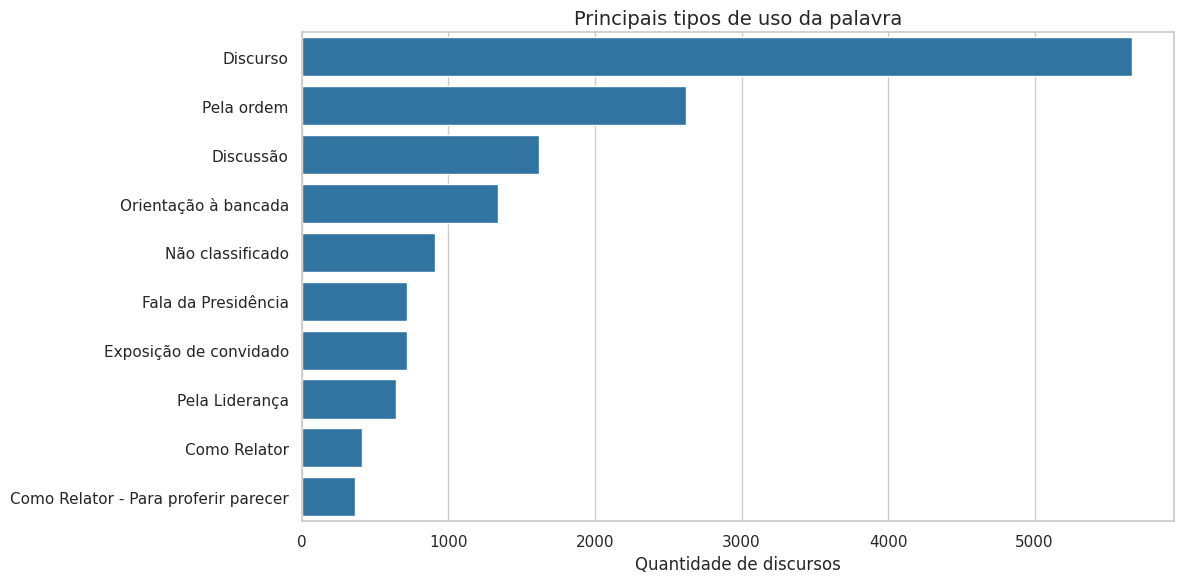

In [15]:
tipo_uso_palavra = (
    df['TipoUsoPalavra.Descricao']
      .replace('', 'Não informado')
      .value_counts()
      .head(10)
      .rename('discursos')
      .reset_index()
      .rename(columns={'index': 'Tipo de uso'})
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=tipo_uso_palavra, x='discursos', y='TipoUsoPalavra.Descricao', ax=ax)
ax.set(title='Principais tipos de uso da palavra', xlabel='Quantidade de discursos', ylabel='')
plt.tight_layout()
tipo_uso_palavra

## Analisar texto dos discursos
Nesta etapa tratamos especificamente das colunas textuais, garantindo que valores ausentes sejam padronizados como strings vazias antes de calcular comprimentos ou alimentar modelos. Essa padronização evita erros em operações de string e torna explícito que campos sem conteúdo são representados de forma neutra no dataframe.


In [16]:
text_columns = [
    'Resumo', 'Indexacao', 'TextoIntegral', 'TextoIntegralTxt',
    'TextoDiscursoIntegral', 'TipoUsoPalavra.Descricao', 'TipoUsoPalavra.Sigla',
    'TipoUsoPalavra.Codigo', 'TipoUsoPalavra.IndicadorAtivo',
    'Publicacoes.Publicacao', 'Apartes.Aparteante', 'CargoAutor',
    'OrgaoAutor', 'PaisAutor'
]
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].fillna('').astype(str)

df[df['TextoDiscursoIntegral'] == '']

,id,CodigoPronunciamento,Casa,Data,Resumo,Indexacao,TextoIntegral,TextoIntegralTxt,UrlTextoBinario,TipoAutor,FuncaoAutor,NomeAutor,CodigoParlamentar,Partido,UF,TipoUsoPalavra.Codigo,TipoUsoPalavra.Sigla,TipoUsoPalavra.Descricao,TipoUsoPalavra.IndicadorAtivo,Publicacoes.Publicacao,Apartes.Aparteante,__janela_inicio,__janela_fim,CargoAutor,OrgaoAutor,PaisAutor,TextoDiscursoIntegral,ok,status,msg,ano,mes,dia_semana
1607,455207,455207,Congresso Nacional,2019-06-11,Considerações sobre a importância para o País ...,"COMENTARIO, IMPORTANCIA, APROVAÇÃO, PROJETO DE...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Marcelo Castro,742,MDB,PI,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-06-13', 'FontePublic...",,2019-06-05,2019-07-05,,,,,False,404,404 (sem texto integral),2019,2019-06,Terça
2803,461050,461050,Senado Federal,2019-11-01,"Defesa de uma reforma tributária, em tramitaçã...","DEFESA, REFORMA TRIBUTARIA, TRAMITAÇÃO, CONGRE...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Confúcio Moura,475,MDB,RO,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-11-02', 'FontePublic...",,2019-10-07,2019-11-06,,,,,False,404,404 (sem texto integral),2019,2019-11,Sexta
3365,462708,462708,Congresso Nacional,2019-11-19,Encerramento da Sessão Solene destinada a come...,"ENCERRAMENTO, SESSÃO SOLENE, DESTINAÇÃO, COMEM...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Jorginho Mello,5350,PL,SC,4824,FP,Fala da Presidência,Sim,"[{'DataPublicacao': '2019-11-21', 'FontePublic...",,2019-11-07,2019-12-07,,,,,False,404,404 (sem texto integral),2019,2019-11,Terça
3366,462707,462707,Congresso Nacional,2019-11-19,Sessão Solene destinada a comemorar a Semana G...,"SESSÃO SOLENE, DESTINAÇÃO, COMEMORAÇÃO, SEMANA...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Autor Externo,EXTERNO,CARLOS ALEXANDRE DA COSTA,None,None,None,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-11-21', 'FontePublic...",,2019-11-07,2019-12-07,,,,,False,404,404 (sem texto integral),2019,2019-11,Terça
3367,462705,462705,Congresso Nacional,2019-11-19,Sessão Solene destinada a comemorar a Semana G...,"SESSÃO SOLENE, DESTINAÇÃO, COMEMORAÇÃO, SEMANA...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Autor Externo,EXTERNO,ALCIDE ANDRADE,None,None,None,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-11-21', 'FontePublic...",,2019-11-07,2019-12-07,,,,,False,404,404 (sem texto integral),2019,2019-11,Terça
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,484317,484317,Senado Federal,2021-09-21,"Orientação à bancada, pela Liderança do Govern...","ORIENTAÇÃO, BANCADA, PROPOSTA DE EMENDA A CONS...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Fernando Bezerra Coelho,5540,MDB,PE,11338,POB,Orientação à bancada,Sim,"[{'DataPublicacao': '2021-09-22', 'FontePublic...",,2021-09-19,2021-10-19,,,,,False,404,404 (sem texto integral),2021,2021-09,Terça
9089,484315,484315,Senado Federal,2021-09-21,"Orientação à bancada, pelo Partido PROS, sobre...","ORIENTAÇÃO, BANCADA, PROPOSTA DE EMENDA A CONS...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Telmário Mota,5535,PROS,RR,11338,POB,Orientação à bancada,Sim,"[{'Data

### Palavras e caracteres por discurso
Geramos variáveis adicionais com a contagem de palavras e caracteres do texto integral e do resumo, criando features numéricas que sintetizam o tamanho das falas. Esses campos (`texto_len_palavras`, `texto_len_caracteres` e `resumo_len_palavras`) são úteis tanto para análises de dispersão quanto para alimentar algoritmos supervisionados com metadados quantificáveis do discurso.


In [17]:

df['texto_len_palavras'] = df['TextoDiscursoIntegral'].str.split().str.len()
df['texto_len_caracteres'] = df['TextoDiscursoIntegral'].str.len()
df['resumo_len_palavras'] = df['Resumo'].str.split().str.len()

df[['id', 'texto_len_palavras', 'texto_len_caracteres', 'resumo_len_palavras']].head()

,id,texto_len_palavras,texto_len_caracteres,resumo_len_palavras
0,451286,873,5650,46
1,451285,1588,10113,31
2,451205,4682,28440,57
3,451203,3515,20792,17
4,451202,5774,35028,22


### Distribuição do tamanho dos discursos
O histograma em `sns.histplot` revela uma distribuição assimétrica positiva: a maioria dos discursos concentra-se abaixo de mil palavras, mas há uma cauda longa com pronunciamentos extensos que ultrapassam 5 mil ou 10 mil palavras. Esse padrão evidencia a coexistência de intervenções curtas e relatórios completos dentro do mesmo corpus, influenciando métricas como média e desvio-padrão.


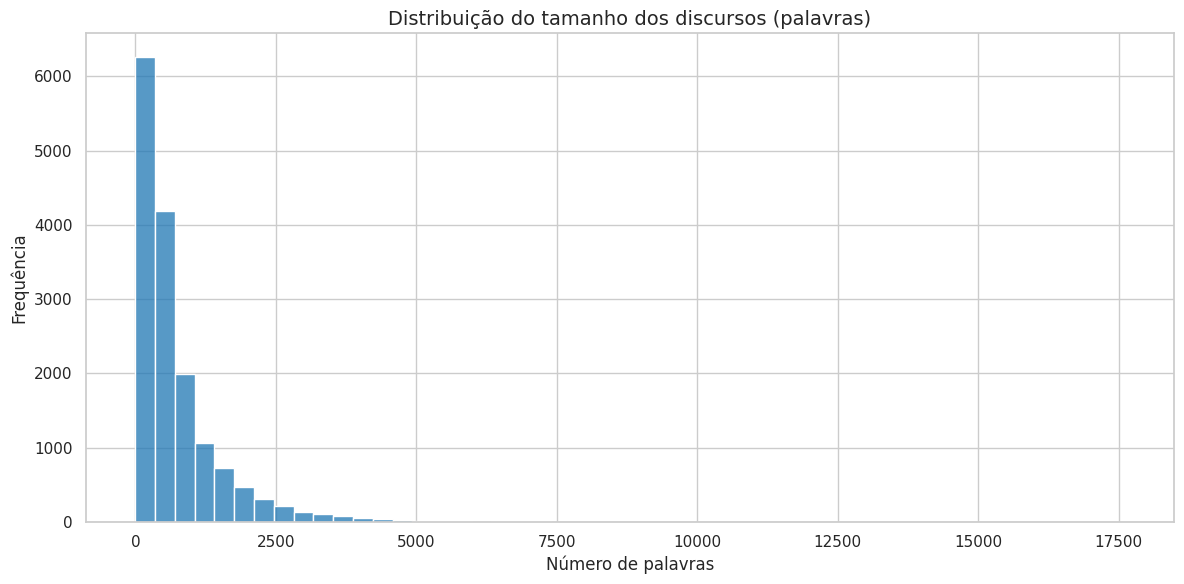

In [18]:
fig, ax = plt.subplots()
sns.histplot(df['texto_len_palavras'], bins=50, ax=ax)
ax.set(title='Distribuição do tamanho dos discursos (palavras)', xlabel='Número de palavras', ylabel='Frequência')
plt.tight_layout()

### Tamanho do discurso (palavras e caracteres)
A tabela `tamanho_discursos` resume estatísticas descritivas: a mediana de 464 palavras significa que metade dos discursos se encerra nesse ponto, sugerindo falas com duração aproximada de cinco a sete minutos. O primeiro quartil de 195 palavras identifica os pronunciamentos mais concisos, típicos de apartes ou comunicações rápidas, enquanto o terceiro quartil de 912 palavras destaca pronunciamentos substantivos, muitas vezes relatórios ou intervenções de líderes.

Em caracteres, a mediana de 2.842 reforça essa leitura, com 25% dos discursos abaixo de 1.201 caracteres (mensagens protocolares) e 25% acima de 5.595 caracteres (falas densas). A amplitude entre mínimo e máximo, que chega a 106.610 caracteres, indica a presença de documentos integrais anexados ao sistema, o que exige atenção em etapas de pré-processamento textual.


In [19]:
tamanho_discursos = pd.DataFrame({
    'palavras': df['texto_len_palavras'].describe().round(2),
    'caracteres': df['texto_len_caracteres'].describe().round(2)
})
tamanho_discursos

,palavras,caracteres
count,15729.00,15729.00
mean,727.83,4450.81
std,880.17,5326.02
min,0.00,0.00
25%,195.00,1201.00
50%,464.00,2842.00
75%,912.00,5595.00
max,17602.00,106610.00


## Nuvem de Palavras dos Discursos
A nuvem de palavras sintetiza o vocabulário predominante nas transcrições integrais, destacando termos recorrentes em debates de plenário e comissões. Ao visualizar as palavras mais frequentes, contextualizamos os temas que pautaram a legislatura e conectamos o conteúdo textual às estatísticas apresentadas anteriormente.

O código desta seção concatena os discursos disponíveis, remove entradas vazias e aplica uma lista ampliada de stopwords em português para que nomes institucionais ou conectivos não dominem a figura. O resultado funciona como um sumário visual dos assuntos que mobilizaram o Senado na 56.ª Legislatura, servindo de ponte entre análises descritivas e investigações qualitativas.


In [20]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


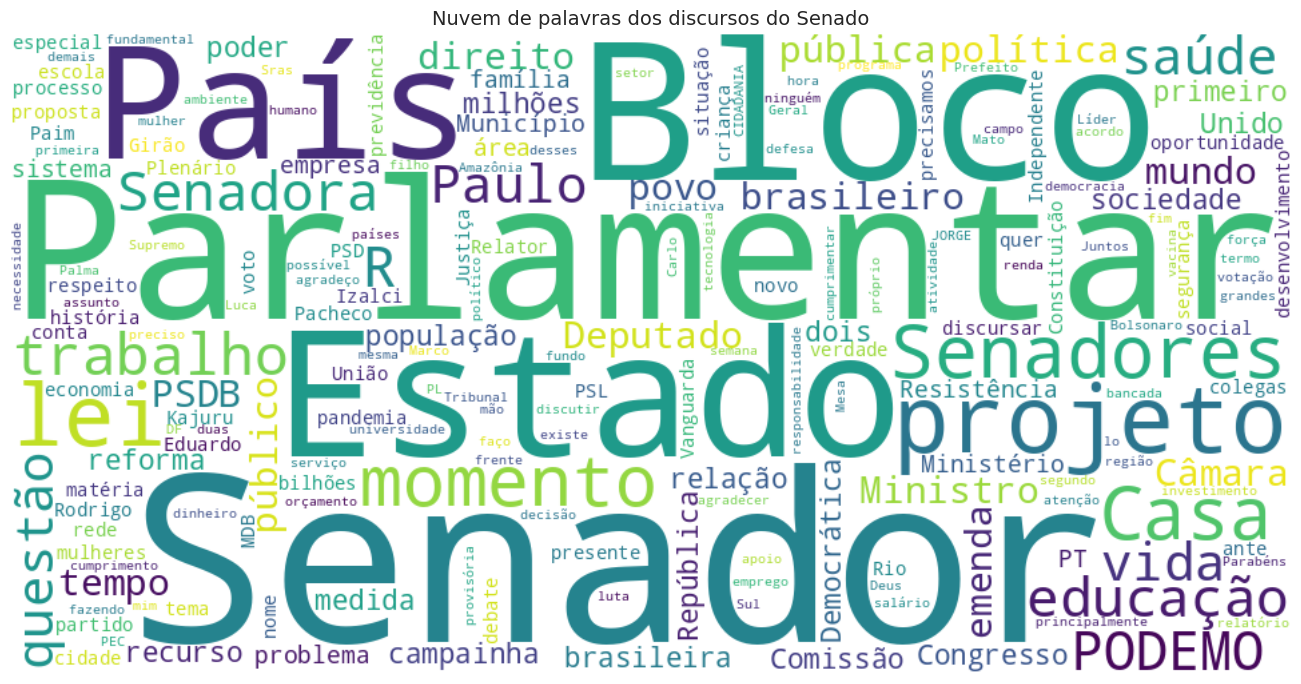

In [21]:
from wordcloud import WordCloud
from nltk.corpus import stopwords as nltk_stopwords
import nltk

nltk.download('stopwords')
stopwords_pt = set(nltk_stopwords.words('portuguese'))
stopwords_extra = {
    'senhor', 'senhora', 'senhores', 'senhoras', 'presidente', 'presidência',
    'senado', 'federal', 'brasil', 'brasileiros', 'brasileiras', 'palavra',
    'sessão', 'ordem', 'anos', 'ano', 'quero', 'fazer', 'feito', 'gente',
    'nosso', 'nossa', 'nossos', 'nossas', 'dizer', 'diz', 'fez', 'governo',
    'nacional', 'discurso', 'então', 'sr', 'pode', 'aqui', 'grande', 'pessoa', 'todo',
    'hoje', 'dia', 'dessa', 'lá', 'Exa', 'vai', 'hoje', 'porque', 'agora', 'ainda',
    'sempre', 'sobre', 'vamo', 'Deu', 'claro', 'importante', 'inclusive', 'todos',
    'toda', 'obrigado', 'outro', 'pessoas', 'pouco', 'parte', 'três', 'Soa', 'colega', 'queria', 'disse',
    'desse', 'forma', 'além', 'ver', 'forma', 'vamos', 'ter', 'bem', 'outra', 'muita', 'muitas', 'certeza',
    'apena', 'caso', 'ontem', 'sim', 'desde', 'realmente', 'aí', 'Sra', 'V',
    'todas', 'dias', 'amigo', 'tudo', 'outras', 'vez', 'desde', 'número', 'vou', 'fala',
    'precisa', 'possa', 'sabe', 'neste', 'junto', 'art', 'assim', 'maior', 'mil', 'alguma', 'falando',
    'portanto', 'dentro', 'fato', 'desta', 'nessa', 'nesse', 'onde', 'nova', 'quanto', 'disso', 'srs',
    'ali', 'bom', 'coisa', 'outros', 'vezes', 'tanto', 'deste', 'nesta', 'têm', 'cada', 'faz', 'sendo',
    'boa', 'menos', 'último', 'vão', 'meio', 'nº', 'nada', 'dado', 'quase', 'exatamente',
    'gostaria', 'importância', 'alguns', 'ponto', 'tanto', 'qualquer', 'pois', 'sentido', 'vem', 'tão',
    'dá', 'partir', 'contra', 'dar', 'sei', 'apenas', 'deve', 'melhor', 'nunca', 'através', 'deixar', 'obrigada',
    'acho', 'nenhum', 'exemplo', 'mínimo', 'lado', 'muitos', 'falar'
}

stopwords = stopwords_pt.union(stopwords_extra)

textos = df['TextoDiscursoIntegral'].dropna()
textos = textos[textos.str.len() > 0]
if textos.empty:
    print('Não há textos integrais disponíveis para gerar a nuvem de palavras.')
else:
    corpus = ' '.join(textos.values)
    wordcloud = WordCloud(
        width=960,
        height=480,
        background_color='white',
        max_words=200,
        collocations=False,
        stopwords=stopwords
    ).generate(corpus)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title('Nuvem de palavras dos discursos do Senado', fontsize=14)
    plt.tight_layout()


## Principais achados
O conjunto evidencia a forte concentração de discursos entre 2019 e 2022, com retomada vigorosa após a fase aguda da pandemia e participação destacada de partidos como PT, Podemos e MDB. A distribuição semanal confirma que terça a quinta-feira são os dias centrais do trabalho legislativo, enquanto análises por autor, partido e UF revelam o protagonismo de lideranças regionais específicas.

As métricas textuais mostram que discursos medianos têm 464 palavras (2,8 mil caracteres), mas há ampla variação que inclui intervenções rápidas e relatos extensos. Esse panorama orienta as próximas fases do projeto, indicando quais variáveis devem ser priorizadas na modelagem supervisionada e quais campos exigem tratamento adicional de qualidade de dados.
